In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image_path = 'image1.jpeg'
image = cv2.imread(image_path)

In [4]:
def extract_rgb_color_features(image):
    # Calculate mean and standard deviation of each channel (Red, Green, Blue)
    mean, std = cv2.meanStdDev(image)
    r_mean, g_mean, b_mean = mean.flatten()
    r_std, g_std, b_std = std.flatten()

    # Calculate color histograms for each channel
    hist_r = cv2.calcHist([image], [0], None, [256], [0, 256])
    hist_g = cv2.calcHist([image], [1], None, [256], [0, 256])
    hist_b = cv2.calcHist([image], [2], None, [256], [0, 256])

    return (r_mean, g_mean, b_mean, r_std, g_std, b_std, hist_r, hist_g, hist_b)


In [5]:
r_mean, g_mean, b_mean, r_std, g_std, b_std, hist_r, hist_g, hist_b = extract_rgb_color_features(image)

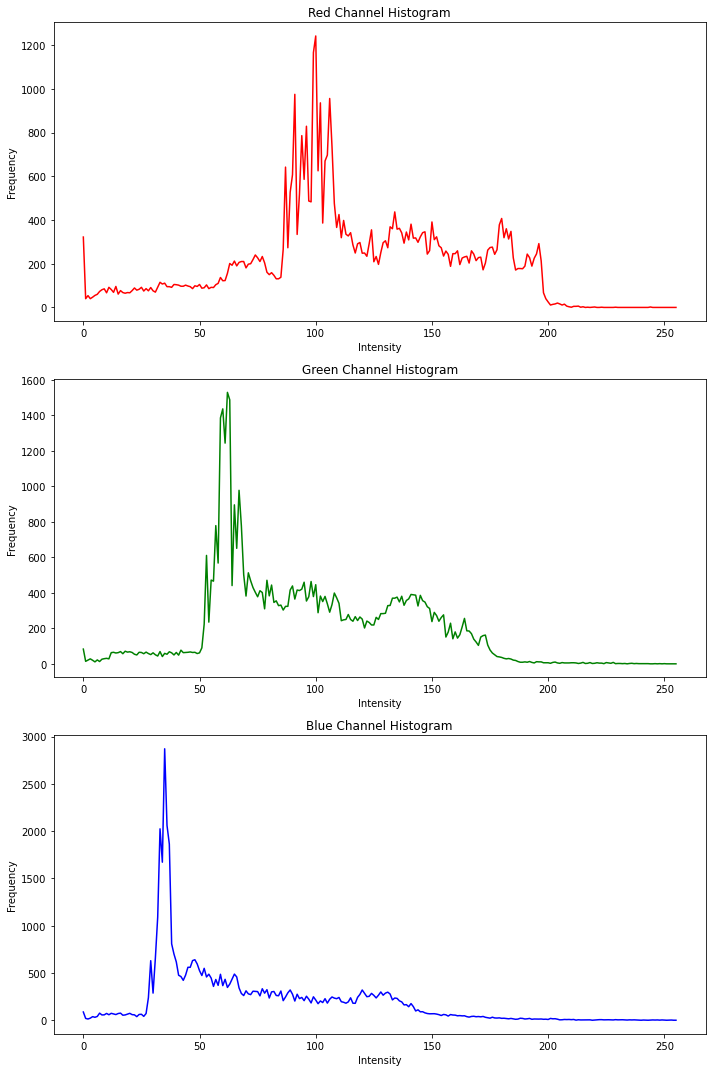

In [6]:
# Plot RGB Histograms
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Red channel histogram
axs[0].plot(hist_r, color='red')
axs[0].set_title('Red Channel Histogram')
axs[0].set_xlabel('Intensity')
axs[0].set_ylabel('Frequency')

# Green channel histogram
axs[1].plot(hist_g, color='green')
axs[1].set_title('Green Channel Histogram')
axs[1].set_xlabel('Intensity')
axs[1].set_ylabel('Frequency')

# Blue channel histogram
axs[2].plot(hist_b, color='blue')
axs[2].set_title('Blue Channel Histogram')
axs[2].set_xlabel('Intensity')
axs[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


RGB color space is inconsisent. A lot of research use HSV space

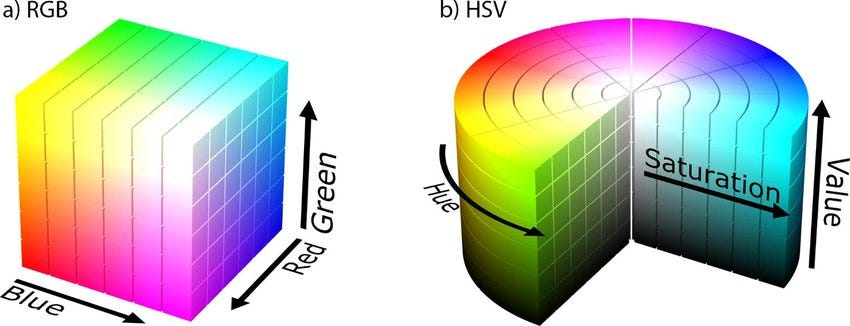

In [8]:
def extract_color_features(image):

    # Convert image to HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Calculate mean and standard deviation of each channel (Hue, Saturation, Value)
    mean, std = cv2.meanStdDev(hsv_image)
    h_mean, s_mean, v_mean = mean.flatten()
    h_std, s_std, v_std = std.flatten()

    # Calculate color histogram
    hist = cv2.calcHist([hsv_image], [0, 1, 2], None, [8, 8, 8], [0, 180, 0, 256, 0, 256])
    hist = cv2.normalize(hist, hist).flatten()

    return (h_mean, s_mean, v_mean, h_std, s_std, v_std, hist)

In [9]:
h_mean, s_mean, v_mean, h_std, s_std, v_std, hist = extract_color_features(image)
print("Hue Mean:", h_mean)
print("Saturation Mean:", s_mean)
print("Value Mean:", v_mean)
print("Hue Std Dev:", h_std)
print("Saturation Std Dev:", s_std)
print("Value Std Dev:", v_std)
# print("Color Histogram:", hist)

Hue Mean: 86.3696393182719
Saturation Mean: 129.78814902893382
Value Mean: 123.79377724930637
Hue Std Dev: 33.71707594989652
Saturation Std Dev: 46.64499708791641
Value Std Dev: 40.423457135219245


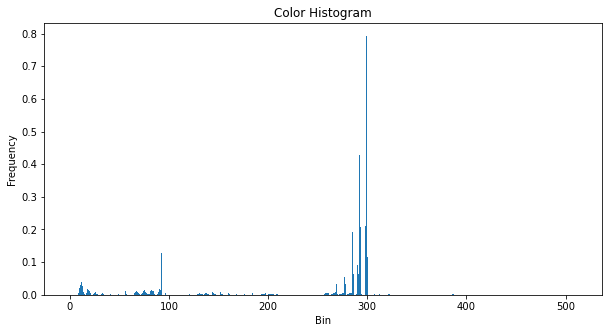

In [10]:
fig = plt.figure(figsize=(10, 5))
plt.bar(range(len(hist)), hist)
plt.xlabel('Bin')
plt.ylabel('Frequency')
plt.title('Color Histogram')
plt.show()

In [12]:
def segment_object_hsv(image, lower_hsv, upper_hsv):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv_image, lower_hsv, upper_hsv)
    segmented_image = cv2.bitwise_and(image, image, mask=mask)
    return segmented_image

In [13]:
lower_green = np.array([30, 50, 50])
upper_green = np.array([90, 255, 255])

In [14]:
path_new = 'balloons.jpeg'
image_new = cv2.imread(path_new)

In [16]:
segmented_object = segment_object_hsv(image_new, lower_green, upper_green)
# Display results
cv2.imshow("Original Image", image_new)
cv2.imshow("Segmented Object", segmented_object)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [22]:
def classify_day_night_image_hsv(image):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    value_channel = hsv_image[:, :, 2]
    mean_value = np.mean(value_channel)
    threshold = 80
    # Classify based on mean value
    if mean_value > threshold:
        return 'day'
    else:
        return 'night'


In [27]:
image_night = cv2.imread('night.jpeg')

In [29]:
time_of_day = classify_day_night_image_hsv(image)
print("Time of day:", time_of_day)

Time of day: day


LBP

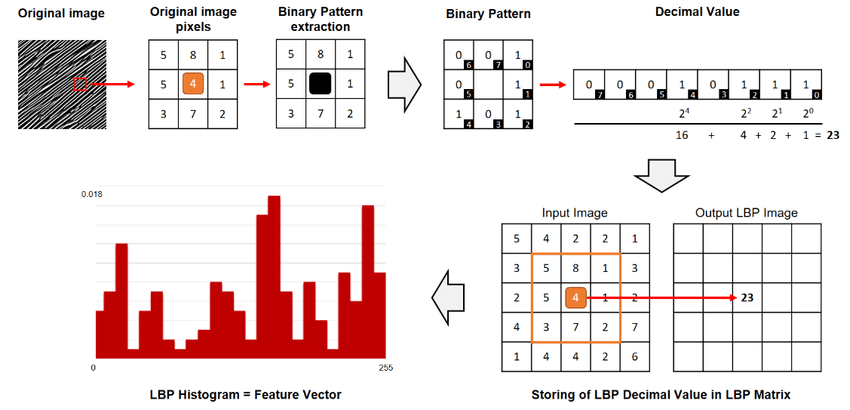

In [30]:
def compute_lbp(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Initialize the LBP image
    lbp = np.zeros_like(gray)
    # Iterate over each pixel in the image
    for y in range(1, gray.shape[0] - 1):
        for x in range(1, gray.shape[1] - 1):
            # Get the center pixel value
            center = gray[y, x]
            # Initialize the LBP code
            code = 0
            # Iterate over the neighbor pixels
            for i, (dy, dx) in enumerate([(0, 1), (-1, 1), (-1, 0), (-1, -1), (0, -1), (1, -1), (1, 0), (1, 1)]):
                # Get the neighbor pixel value
                neighbor = gray[y + dy, x + dx]
                # Update the LBP code
                code |= (neighbor >= center) << i
            # Assign the LBP code to the center pixel
            lbp[y, x] = code

    return lbp

In [31]:
# Compute LBP features
lbp_image = compute_lbp(image)

In [32]:
cv2.imshow('Original Image', image)
cv2.imshow('LBP Image', lbp_image)
cv2.waitKey(0)
cv2.destroyAllWindows()